# How to use the ExcludeMaskRegion objects

In this tutorial, we go over some details on the usage of the ExcludeMaskRegion objects, which can be used to remove lines from a mask in specified problem spectral regions.

First, we need to import `specpolFlow` and some other packages:

In [1]:
import specpolFlow as pol
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Structure of an `ExcludeMaskRegion` Object

An `ExcludeMaskRegion` object contains lists of starting wavelengths, stopping wavelengths, and labels, for regions to be excluded from the mask. Typically the starting and stopping wavelengths are numpy arrays, and the labels are in a numpy array of strings.  

An `ExcludeMaskRegion` object can be saved to a file or read from a file.  The file is a text format: the first column has the starting wavelength (nm) of each region to be excluded, the second has the stopping wavelength (nm), and the third column (and rest of the line) is an optional label for each region.

## 2. Creating Your Own 

To create a custom `ExcludeMaskRegion` object we must first define the regions we wish to exclude from the mask.  Here is an example with somewhat arbitrary values.  We can then pass those into the class constructor to get a `ExcludeMaskRegion` object.

In [2]:
start = [600.0, 650.0, 700.0] # region start in nm
stop = [620.0, 660.0, 780.0] # region stop in nm
type = ['region 1', 'region 2', 'region 3'] # description (optional)
regions = pol.ExcludeMaskRegions(np.array(start), np.array(stop), np.array(type, dtype=object))
print(regions.start)
print(regions.stop)
print(regions.type)

[600. 650. 700.]
[620. 660. 780.]
['region 1' 'region 2' 'region 3']


We can also generate a `ExcludeMaskRegion` object by reading a file.  Here we use pandas to quickly generate a text `.dat` file.  When making the `.dat` file it is important that the column separation is white space (a tab or blank space, not a comma).  If pandas is used (like below), there is no index or header in the file. 

In [3]:
dat = pd.DataFrame([start, stop, type], index = ['start', 'stop', 'type']).T
dat.to_csv('ExcludeMaskRegionsClass_tutorialfiles/ExcludeMaskRegions_custom.dat', header = False, index = False, sep = '\t')

Then we can read the file of exclude regions in using the <a href='../API/Mask_API.html#specpolFlow.read_exclude_mask_regions'>read_exclude_mask_regions</a> function.  The `ExcludeMaskRegion` object can also be converted to a pandas data frame like below.

In [4]:
regions = pol.read_exclude_mask_regions('ExcludeMaskRegionsClass_tutorialfiles/ExcludeMaskRegions_custom.dat')
pd.DataFrame(regions.to_dict())

,start,stop,type
0,600.0,620.0,region 1
1,650.0,660.0,region 2
2,700.0,780.0,region 3


## 3. Use the Default Functions

Two default sets of regions are included within `SpecpolFlow` as well. 

The first is the hydrogen <a href='../API/Mask_API.html#specpolFlow.get_Balmer_regions_default'>Balmer line regions</a>. This region selection also requires an input parameter called `velrange` which specifies the Doppler velocity range (in km/s) around the Balmer lines to be removed. In the example below, we remove a region of 100 km/s around each Balmer line, as well as the Balmer jump region.

The second default region is the <a href='../API/Mask_API.html#specpolFlow.get_telluric_regions_default'>telluric regions</a>. These are regions of heavy contamination by absorption lines from the earth's atmosphere, which are present when taking data from ground based instruments. 

In [5]:
regionsBalmer = pol.get_Balmer_regions_default(velrange=100.)
pd.DataFrame(regionsBalmer.to_dict())

,start,stop,type
0,656.062088,656.499912,Halpha
1,485.977841,486.302159,Hbeta
2,433.905217,434.194783,Hgamma
3,410.033182,410.306818,Hdelta
4,396.877572,397.142428,Hepsilon
5,360.000000,392.000000,Hjump


In [6]:
regionsTelluric = pol.get_telluric_regions_default()
pd.DataFrame(regionsTelluric.to_dict())

,start,stop,type
0,587.5,592.0,telluric
1,627.5,632.5,telluric
2,684.0,705.3,telluric
3,717.0,735.0,telluric
4,757.0,771.0,telluric
5,790.0,795.0,telluric
6,809.0,990.0,telluric


## 4. Combining Multiple `ExcludeMaskRegions`

If you have multiple `ExcludeMaskRegions` objects, as when using the default Balmer and telluric regions, you can combine the objects to make a single object for ease of reading and writing files, and for the mask cleaning itself. Here we use the overloaded + operator to concatenate two regions.

In [7]:
regionsJoint = regionsBalmer + regionsTelluric

pd.DataFrame(regionsJoint.to_dict())

,start,stop,type
0,656.062088,656.499912,Halpha
1,485.977841,486.302159,Hbeta
2,433.905217,434.194783,Hgamma
3,410.033182,410.306818,Hdelta
4,396.877572,397.142428,Hepsilon
5,360.000000,392.000000,Hjump
6,587.500000,592.000000,telluric
7,627.500000,632.500000,telluric
8,684.000000,705.300000,telluric
9,717.000000,735.000000,telluric


## 5. Save to Files & Read from Files

`ExcludeMaskRegions` objects can also be saved to and read from `.dat` files, as shown below.  The `save` function of the `ExcludeMaskRegions` class takes one argument, which is the file name to save to (optionally including a path).  Similarly, the <a href='../API/Mask_API.html#specpolFlow.read_exclude_mask_regions'>read_exclude_mask_regions</a> function takes the name of a file to read, and returns an `ExcludeMaskRegions` object.

In [8]:
regionsJoint.save('ExcludeMaskRegionsClass_tutorialfiles/ExcludeMaskRegions.dat')

In [9]:
regions = pol.read_exclude_mask_regions('ExcludeMaskRegionsClass_tutorialfiles/ExcludeMaskRegions.dat')
pd.DataFrame(regions.to_dict())

,start,stop,type
0,656.0621,656.4999,Halpha
1,485.9778,486.3022,Hbeta
2,433.9052,434.1948,Hgamma
3,410.0332,410.3068,Hdelta
4,396.8776,397.1424,Hepsilon
5,360.0000,392.0000,Hjump
6,587.5000,592.0000,telluric
7,627.5000,632.5000,telluric
8,684.0000,705.3000,telluric
9,717.0000,735.0000,telluric


## 6. Using `ExcludeMaskRegions` Object to Clean a Mask

The `ExcludeMaskRegions` object can be used to clean the mask, removing lines inside regions defined in the `ExcludeMaskRegions` object. This can be done with the `clean` function of a <a href='../API/LSD_API.html#specpolFlow.Mask'>Mask</a> object, by passing the function an `ExcludeMaskRegions`.

In this example we read in a mask, then clean it using the above exclude regions that covered Balmer and telluric lines. The `clean` function flags the lines to not be used (setting `iuse = 0` for those lines in the mask). Then the `prune()` delete those lines from the mask completely (along with any other lines with `iuse = 0`).  Finally, we plot the mask before and after cleaning.

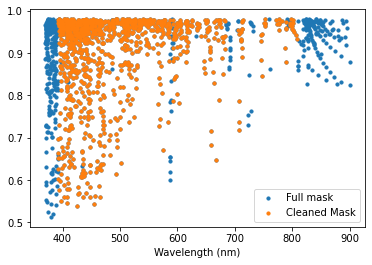

In [10]:
mask = pol.read_mask('ExcludeMaskRegionsClass_tutorialfiles/T27000G35_depth0.02.mask')

mask_clean = mask.clean(regionsJoint).prune()

fig, ax = plt.subplots(1 ,1)
ax.scatter(mask.wl, 1-mask.depth, s=10, label='Full mask')
ax.scatter(mask_clean.wl, 1-mask_clean.depth, s=10, label='Cleaned Mask')
ax.set_xlabel('Wavelength (nm)')
ax.legend(loc=0)
plt.show()